In [2]:
import numpy as np
import matplotlib.pyplot as plt

https://en.wikipedia.org/wiki/Matrix_similarity

If a matrix is square and has a rank equal to its dimensionality, is that rank similar to all other matrices with those properties?

If a matrix is 3x3 and has a rank of 2, is that matrix similar to all other 3x3 matrices of rank 2?

If a matrix is 3x3 and has a rnak of 1, is that matrix similar to all other 3x3 matrices of rank 1?

META QUESTION: how many "classes" of similarity are there? Can I make observations about any properties of two matrices and conclude that they're similar?

My instinct is that if they have the same rank and dimensionality, they're similar, except if the rank is lower than the dimensionality, because then a change of basis matrix won't be invertible.


(array([[  1.52294801e-01,   9.88335112e-01,   5.92118946e-16],
       [  4.41996899e-01,  -6.81083054e-02,  -8.94427191e-01],
       [  8.83993798e-01,  -1.36216611e-01,   4.47213595e-01]]), array([  9.59517403e+00,   1.71249387e+00,   7.25194643e-16]), array([[ 0.01587202,  0.72271155,  0.69096751],
       [ 0.57713206,  0.55769288, -0.59657123],
       [ 0.81649658, -0.40824829,  0.40824829]]))
Matrix:
 [[1 2 0]
 [0 3 3]
 [0 6 6]]
Determinant: 0.0
Vec: [1 0 0]. Length: 9.74679434481
Vec: [2 3 6]. Length: 9.74679434481
Vec: [0 3 6]. Length: 9.74679434481
Vector 1, 1, 1 transformed to [ 3  6 12]


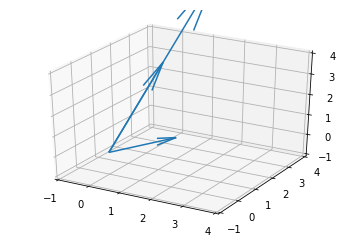

Matrix:
 [[1 1 0]
 [2 1 0]
 [1 2 0]]
Determinant: 0.0
Vec: [1 2 1]. Length: 3.46410161514
Vec: [1 1 2]. Length: 3.46410161514
Vec: [0 0 0]. Length: 3.46410161514
Vector 1, 1, 1 transformed to [2 3 3]


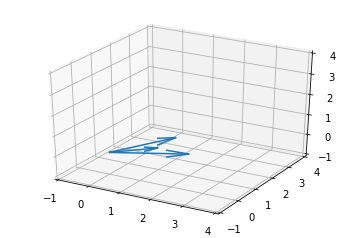

Matrix:
 [[ 5  3  0]
 [ 9  9  0]
 [18 18  0]]
Determinant: 0.0
Vec: [ 5  9 18]. Length: 29.0516780927
Vec: [ 3  9 18]. Length: 29.0516780927
Vec: [0 0 0]. Length: 29.0516780927
Vector 1, 1, 1 transformed to [ 8 18 36]


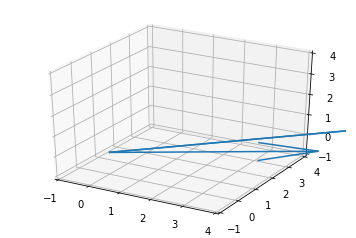

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# In 3D!

rank3 = np.array([[1, 2, 0], [0, 3, 3], [0, 1, 5]])
rank3_inv = np.linalg.inv(rank3)

rank2 = np.array([[1, 2, 0], [0, 3, 3], [0, 6, 6]])
# Not invertible: this matrix is singular (see: the last two vectors).
# However, we can get its singular value decomposition:
print(np.linalg.svd(rank2))
# What can I make of these singular vectors? What does it mean to transform a space by a matrix
# and then transform it by its transpose?

another_rank2 = np.array([[1, 1, 0], [2, 1, 0], [1, 2, 0]])

# Visualizing transforming space by two rank-2 matrices
to_print = [rank2, another_rank2, rank2 @ another_rank2]

for M in to_print:
    print("Matrix:\n", M)
    print("Determinant:", np.linalg.det(M))
    U, V, W = M.T
    for _V in (U, V, W):
        print("Vec: %s. Length: %s" % (_V, np.linalg.norm(M)))

    print("Vector [1, 1, 1] transformed to", M @ [1, 1, 1])
        
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    origin = [0, 0, 0]
    ax.quiver(origin, origin, origin, U, V, W)
    ax.set_xlim([-1, 4])
    ax.set_ylim([-1, 4])
    ax.set_zlim([-1, 4])
    plt.show()

# ...this is hard to see. Let's try 2D.


Input:
 [[1 1]
 [2 2]]
Determinant: 0.0
Vec: [1 2]. Length: 3.16227766017
Vec: [1 2]. Length: 3.16227766017


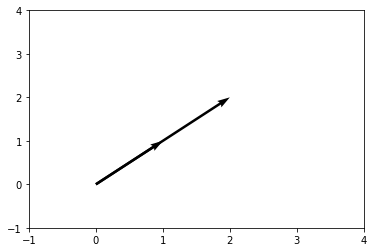

Input:
 [[2]
 [4]]
Vec: 2. Length: 4.472135955
Vec: 4. Length: 4.472135955


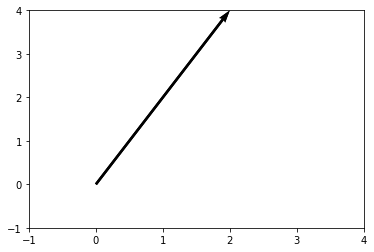

In [141]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# In 2D.

rank2 = np.array([[1, 2], [0, 3]])
rank2_inv = np.linalg.inv(rank2)

rank1 = np.array([[1, 1], [2, 2]])
# Not invertible: this matrix is singular (see: the last two vectors).
# However, we can get its singular value decomposition:
# print(np.linalg.svd(rank2)
# What can I make of these singular vectors? What does it mean to transform a space by a matrix
# and then transform it by its transpose?

# Confirming that a matrix * its inverse is the ordinary basis. And the simplest diagonal.
to_print = [rank2, rank2_inv, rank2 @ rank2_inv]

# Visualizing a 2x2, rank-1 matrices, and transforming a vector by that matrix
guinea_pig_vector = np.array([[1], [1]])
to_print = [rank1, rank1 @ guinea_pig_vector]

for M in to_print:
    print("Input:\n", M)

    if M.shape == (2, 2):
        print("Determinant:", np.linalg.det(M))

    U, V = M.T.squeeze()
    for _V in (U, V):
        print("Vec: %s. Length: %s" % (_V, np.linalg.norm(M, ord='fro')))
        
    fig = plt.figure()
    ax = plt.gca()
    origin = [0, 0]
    ax.quiver(origin, origin, U, V, angles='xy', scale_units='xy', scale=1)
    ax.set_xlim([-1, 4])
    ax.set_ylim([-1, 4])
    plt.show()

Worth reading:
https://blog.statsbot.co/singular-value-decomposition-tutorial-52c695315254